In [81]:
import json
import math
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics 
import seaborn as sns
from numpy.random import randn
from statistics import mode
%matplotlib inline

In [126]:
pupils = json.load(open('pupils.json', 'r'))    # result will be a python dictionary
classrooms = json.load(open('classrooms.json', 'r'))
#jeder entry ist ein schüler: zB data[0]
print(len(pupils))
print(len(classrooms))

2958
189


# Klassen wählen, die das KI Paket gemacht haben

In [83]:
# taskseriesIDs vom KI Paket:
KI_taskseries_ids = ["AI-1-v2", "AI-2-v2", "AI-3-v2", "AI-4-v2", "ML-1", "ML-2", "ML-3", "Classification-1", "Clustering-1", "Classification-2", "Clustering-2", "LimitsML", "EvalML", "Impact-1", "Impact-2", "Impact-3", "Impact-4", "AIClosing"]

classIDsKI = []
pupilsKI = []

for pupilnumber in range(len(pupils)): #für jeden schüler
    for tasknumber in range(len(pupils[pupilnumber]["solvedTaskSeries"])): #für jede seiner tasks
        if("taskSeriesId" in pupils[pupilnumber]["solvedTaskSeries"][tasknumber].keys()):
            if(pupils[pupilnumber]["solvedTaskSeries"][tasknumber]["taskSeriesId"] in KI_taskseries_ids):
                for sectionnumber in range(len(pupils[pupilnumber]["solvedTaskSeries"][tasknumber]["currentSections"])): #für diese tasks, alle sections
                    for subsectionnumber in range(len(pupils[pupilnumber]["solvedTaskSeries"][tasknumber]["currentSections"][sectionnumber]["currentSubSections"])):
                        if("exercise" in pupils[pupilnumber]["solvedTaskSeries"][tasknumber]["currentSections"][sectionnumber]["currentSubSections"][subsectionnumber].keys()):
                            if pupils[pupilnumber]["classId"] not in classIDsKI:
                                classIDsKI.append(pupils[pupilnumber]["classId"])
                            if pupils[pupilnumber] not in pupilsKI:
                                pupilsKI.append(pupils[pupilnumber])

KI_classes = {classID: {"count": 0} for classID in classIDsKI}

for pupil in pupilsKI:
    KI_classes[pupil["classId"]]["count"] += 1

print(KI_classes)
print("")

# Jetzt nur die Klassen mit genügend SuS auswählen
final_pupils_KI = []
min_class_size = 10

for pupil in pupilsKI:
    if(KI_classes[pupil["classId"]]["count"] >= min_class_size):
        final_pupils_KI.append(pupil)

print("Zur Zeit gibt es " + str(len(final_pupils_KI)) + " sus, die das KI Paket bearbeitet haben")

{'uxfuiLT4xZA6yvE6L': {'count': 2}, 'qFEyvypMn4sAwLwtc': {'count': 26}, 'y7j9eKDPsqNkAycuy': {'count': 1}, 'NXCw6MMERYbnzdTjc': {'count': 1}, '6Z2MmkKQKebb7nz8P': {'count': 3}, '4fyXxCKaLbCBaPbYE': {'count': 1}, 'xYWgeSPkADwSmhdmm': {'count': 2}, 'GkQSJvPTRWsLnpyR9': {'count': 14}, '7cWBWtLEcLSYDygDc': {'count': 1}}

Zur Zeit gibt es 40 sus, die das KI Paket bearbeitet haben


## DF mit classId und pupilId konstruieren

In [84]:
class_list = [{"pupilId": pupil["_id"], "classId": pupil["classId"]} for pupil in final_pupils_KI]
class_df = pd.DataFrame(class_list)

class_df.head()

,pupilId,classId
0,bniRycMi5bwrXjvGy,qFEyvypMn4sAwLwtc
1,sqBXKssFvS8pFYAMv,qFEyvypMn4sAwLwtc
2,Kd6FuRsrq6QvPrkKp,qFEyvypMn4sAwLwtc
3,6bBwnX2mwAp2NAwNR,qFEyvypMn4sAwLwtc
4,ZTvPk2i77LDC8pFmu,qFEyvypMn4sAwLwtc


# Chat df

In [85]:
date = []
sentBy = []
messages = []
request = []

row_nr = 0
for pupil in final_pupils_KI:
    for message in pupil["chat"]["messages"]:
        date.append(message["date"])
        sentBy.append(message["sentBy"])
        messages.append(message["message"])
        if "request" in message.keys():
            request.append(message["request"])
        else:
            request.append(False)

#zipped_list = list(zip((date, sentBy, messages, request)))
#chat_df = pd.DataFrame(zipped_list, columns =["date", "sentBy", "message", "request"])

chat_df = pd.DataFrame(date)
chat_df["sentBy"] = sentBy
chat_df["message"] = messages
chat_df["request"] = request

chat_df.head()
#print(zipped_list)

,0,sentBy,message,request
0,2021-02-23T07:33:51+00:00,sWm4d454H7CgZk7xP,Hier könnt ihr euch individuell aber auch mir ...,False
1,2021-02-23T07:37:04+00:00,auto,feedback,"{'taskSeriesId': 'AI-1-v2', 'userId': 'YQmE5bR..."
2,2021-02-23T08:05:17+00:00,auto,feedback,"{'taskSeriesId': 'AI-4-v2', 'userId': 'YQmE5bR..."
3,2021-02-23T08:10:27+00:00,auto,feedback,"{'taskSeriesId': 'ML-1', 'userId': 'YQmE5bRt4Q..."
4,2021-02-23T08:12:44+00:00,auto,feedback,"{'taskSeriesId': 'ML-2', 'userId': 'YQmE5bRt4Q..."


# Revisions DF

In [163]:
nr_accepted_revisions = 0
nr_unaccepted_revisions = 0

for pupil in pupils:
    #print(pupil.keys())
    if("revisions" in pupil.keys()):
        if (pupil["revisions"]):
            if (pupil["revisions"][0]["accepted"]):
                nr_accepted_revisions +=1
            else:
                nr_unaccepted_revisions += 1

print("nr accepted: " + str(nr_accepted_revisions) + " nr unaccepted: " + str(nr_unaccepted_revisions))

nr accepted: 27 nr unaccepted: 450


Weißt nicht, wie revision gerade eingestellt sind, aber die SuS scheinen sie nicht anzunehmen

## Assists DF

In [123]:
for pupil in final_pupils_KI:
    print(pupil["assists"])

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [129]:
classrooms[0].keys()

dict_keys(['_id', 'className', 'grade', 'taskSeriesCapacity', 'pupils', 'companies', 'pause', 'insights', 'learningObjectives', 'feedbackRequests', 'helpRequests', 'teacherId', 'insightHistory', 'chat', 'surveys', 'badges', 'classEmojiCount', 'news', 'groupRequests', 'units'])

In [149]:
for classroom in classrooms:
    if(classroom["helpRequests"]):
        print(classroom["helpRequests"][0]["taskSeriesId"])
        print(classroom["helpRequests"][0]["question"])
        for message in classroom["helpRequests"][0]["chat"]["messages"]:
            if(message["message"] != "joinedChat"):
                print(message["message"])
        print("")

For-1
fsdfdgfdgdgfh

If-3
wir haben irgendwo einen Fehler gemacht aber wir leider es nicht wissen...:(?

Algorithmic-1-v2
veVDA`WSfasfasfaff
penis
gigh

AlgorithmicAlltag-2-v2
Das ist zu kompliziert...
tut mir Leid

Algorithmic-1-v2
Hilfe wie geht das?
hey

Algorithmic-2-v2
Keine Ahnung

Algorithmic-3-v2
Wie geht das hier?

LoopsVergleich-2-v2
hilfe ich komme nicht weiter kann mir jemnd helfen?



* In den meisten Klassen wurde noch nie Hilfe gestellt. Gibt nur 8 Hilfeanfragen überhaupt. Alle sind im Algorithmen-Paket
  * zwei haben gibberish als Frage
  * zwei sind keine fragen udn stellen nur fest, dass es nicht geht
  * 4 Fragen um Hilfe (Niemand fragt um verständnis)
* gibt nur 4 antworten (gibberish, penis, hey, tut mir Leid)

# Alle von SuS bearbeitete Aufgaben im KI Paket in einen DF

In [87]:
tasktypes = ["blockly", "multipleChoice", "freetext", "survey", "inputField", "surveySlider", "noTask"]
exercise_keys = ['state', 'submitted', 'subType', 'evaluation', 'falseAttempts', 'hintsTaken', 'rating', 'teacherFeedback', "history"]

# TODO: nehme hier alle Aufgaben von SuS, die das KI Paket bearbeitet haben, nicht nur diese Inhalte --> einschränken?

columns = ["pupilId", "taskId", "taskSeriesId", "duration"] + exercise_keys
pupil_df = pd.DataFrame(columns=columns)

row_nr = 0
for pupil in final_pupils_KI:
    for task in pupil["solvedTaskSeries"]:
        sec_nr = 1
        for section in task["currentSections"]:
            subsec_nr = 1
            for subsection in section["currentSubSections"]:
                # eine neue Zeile hinzufügen für jede bearbeitete Aufgabe und id columns füllen
                #df = df.append({"pupilId": pupil["_id"], "taskId": str(task["taskSeriesId"])+"-"+str(sec_nr)+"-"+str(subsec_nr),'taskSeriesId': task["taskSeriesId"], "sec_nr": sec_nr, "subsec_nr": subsec_nr}, ignore_index=True)
                pupil_df = pupil_df.append({"pupilId": pupil["_id"], "taskId": str(task["taskSeriesId"])+"-"+str(sec_nr)+"-"+str(subsec_nr),'taskSeriesId': task["taskSeriesId"], "duration": subsection["duration"]}, ignore_index=True)
                subsec_nr += 1
                if("exercise" in subsection.keys()):
                    # hier wird der eigentliche state der aufgabe in die reihe eingetragen
                    for key in subsection["exercise"].keys():
                        pupil_df.at[row_nr, key] = subsection["exercise"][key]
                row_nr += 1
            sec_nr +=1
    
# aufgaben loswerden, die nicht submitted wurden!
pupil_df.dropna(subset=['submitted'], inplace=True)

#die antworten der einen falschen aufgabe berichtigen
'''
for index in pupil_df.index:
    if(pupil_df.loc[index, "taskId"] == "Classification-2-1-5"):
        if ("2" in str(pupil_df.loc[index, "falseAttempts"])): #die SuS, die es eigentlich richtig hatten
            pupil_df.loc[index, "falseAttempts"] = np.nan
            pupil_df.loc[index, "evaluation"] = "correct"
        elif(pupil_df.loc[index, "pupilId"]=="gooproPtWeTH6dtcB"): #der eine schüler, der es falsch hatte
            pupil_df.loc[index, "falseAttempts"] = [str(pupil_df.loc[index, "state"])]
            pupil_df.loc[index, "evaluation"] = "false"
'''
            
index_names = pupil_df[ pupil_df['taskId'] == "Classification-2-1-5" ].index 
  
# drop these row indexes 
# from dataFrame 
pupil_df.drop(index_names, inplace = True) 

pupil_df.head()


,pupilId,taskId,taskSeriesId,duration,state,submitted,subType,evaluation,falseAttempts,hintsTaken,rating,teacherFeedback,history
0,bniRycMi5bwrXjvGy,AI-1-v2-1-1,AI-1-v2,40,92,True,surveySlider,NaN,NaN,NaN,NaN,NaN,[]
1,bniRycMi5bwrXjvGy,AI-1-v2-1-2,AI-1-v2,119,"<p>Künstliche Intelligenz ist ein Algorithmus,...",True,freetext,correct,NaN,NaN,"{'content': 3, 'format': 5, 'creativity': 4}","Inhaltlich gut, etwas genauer antworten. Muste...",[]
2,bniRycMi5bwrXjvGy,AI-1-v2-2-1,AI-1-v2,268,"[0, 0, 1, 0, 0]",True,survey,NaN,NaN,NaN,NaN,NaN,[]
4,bniRycMi5bwrXjvGy,AI-2-v2-1-1,AI-2-v2,94,"[True, True, False, True]",True,multipleChoice,correct,NaN,NaN,NaN,NaN,[]
6,bniRycMi5bwrXjvGy,AI-3-v2-1-1,AI-3-v2,43,"[False, False, False]",True,multipleChoice,correct,NaN,NaN,NaN,NaN,[]


## DF mit taskSeries bauen

In [88]:
#taskSeries Laden
taskSeries = json.load(open('taskSeries.json', 'r'))    # result will be a python dictionary

In [89]:
#KI_taskseries_ids = ["AI-1-v2", "AI-2-v2", "AI-3-v2", "AI-4-v2", "ML-1", "ML-2", "ML-3", "Classification-1", "Clustering-1", "Classification-2", "Clustering-2", "LimitsML", "EvalML", "Impact-1", "Impact-2", "Impact-3", "Impact-4", "AIClosing"]

interaction_subtypes = ['multipleChoice', 'blockly', 'surveySlider', 'survey', 'inputField', 'freetext']
columns = ["taskId", "question", "answers", "minLabel", "maxLabel", "hints", "sampleSolution"]
task_df = pd.DataFrame(columns=columns)

row_nr = 0
for taskSerie in taskSeries:
    sec_nr = 1
    if taskSerie["_id"] in KI_taskseries_ids:
        for section in taskSerie["sections"]:
            subsec_nr = 1
            for subsection in section["subSections"]:
                for elem in subsection["elements"]:
                    if(elem["subType"] in interaction_subtypes):
                        task_df = task_df.append({"taskId": str(taskSerie["_id"])+"-"+str(sec_nr)+"-"+str(subsec_nr), "question": elem["question"]["de"]}, ignore_index=True)
                        #task_df = task_df.append({"taskId": str(taskSerie["_id"])+"-"+str(sec_nr)+"-"+str(subsec_nr),'taskSeriesId': taskSerie["_id"], "sec_nr": sec_nr, "subsec_nr": subsec_nr, "subType": elem["subType"], "question": elem["question"]["de"]}, ignore_index=True)
                        if(elem["subType"] == "surveySlider"):
                            task_df.at[row_nr, "minLabel"] = elem["specificData"]["minLabel"]["de"]
                            task_df.at[row_nr, "maxLabel"] = elem["specificData"]["maxLabel"]["de"]
                        elif(elem["subType"] == "freetext"):
                            task_df.at[row_nr, "sampleSolution"] = elem["sampleSolution"]["de"]
                        elif(elem["subType"] == "survey"):
                            task_df.at[row_nr, "answers"] = elem["specificData"]["answers"]
                        elif(elem["subType"] == "multipleChoice"):
                            task_df.at[row_nr, "answers"] = elem["specificData"]["answers"]
                            task_df.at[row_nr, "sampleSolution"] = elem["sampleSolution"]["universal"]
                            if(len(elem["hints"]) > 0):
                                task_df.at[row_nr, "hints"] = elem["hints"][0]["de"]
                        elif(elem["subType"] == "inputField"):
                            task_df.at[row_nr, "sampleSolution"] = elem["sampleSolution"]["universal"]
                            if(len(elem["hints"]) > 0):
                                task_df.at[row_nr, "hints"] = elem["hints"][0]["de"]
                        row_nr += 1
                subsec_nr +=1
            sec_nr +=1
            
task_df.head()

,taskId,question,answers,minLabel,maxLabel,hints,sampleSolution
0,AI-1-v2-1-1,"Wie gut weißt du schon, was KI ist?",NaN,Gar nicht,Sehr gut,NaN,NaN
1,AI-1-v2-1-2,Was ist deiner Meinung nach Künstliche Intelli...,NaN,NaN,NaN,NaN,Die Schülerinnen und Schüler (SuS) sollen besc...
2,AI-1-v2-2-1,Wie viele deiner Zeichnungen hat die KI erkann...,"[{'de': '0', 'en-US': '0'}, {'de': '1-2', 'en-...",NaN,NaN,NaN,NaN
3,AI-2-v2-1-1,"Kannst du erkennen, wo KI überall drin steckt?...",[{'de': 'Der Newsfeed eines Social Network nut...,NaN,NaN,"Denk an die Beispiele, die wir uns am Anfang a...","[True, True, False, True]"
4,AI-3-v2-1-1,Was für Sachen können KI-Anwendungen?,"[{'de': 'Die Anwendung, die den Facebook-Feed ...",NaN,NaN,"Kann überhaupt eine dieser Anwendungen etwas, ...","[False, False, False]"


## DF mergen

In [90]:
new_df = pd.merge(pupil_df, task_df, on='taskId')
new_df.drop(columns=['history', "submitted"], inplace=True)

In [91]:
df = pd.merge(class_df, new_df, on="pupilId")
df.head()

,pupilId,classId,taskId,taskSeriesId,duration,state,subType,evaluation,falseAttempts,hintsTaken,rating,teacherFeedback,question,answers,minLabel,maxLabel,hints,sampleSolution
0,bniRycMi5bwrXjvGy,qFEyvypMn4sAwLwtc,AI-1-v2-1-1,AI-1-v2,40,92,surveySlider,NaN,NaN,NaN,NaN,NaN,"Wie gut weißt du schon, was KI ist?",NaN,Gar nicht,Sehr gut,NaN,NaN
1,bniRycMi5bwrXjvGy,qFEyvypMn4sAwLwtc,AI-1-v2-1-2,AI-1-v2,119,"<p>Künstliche Intelligenz ist ein Algorithmus,...",freetext,correct,NaN,NaN,"{'content': 3, 'format': 5, 'creativity': 4}","Inhaltlich gut, etwas genauer antworten. Muste...",Was ist deiner Meinung nach Künstliche Intelli...,NaN,NaN,NaN,NaN,Die Schülerinnen und Schüler (SuS) sollen besc...
2,bniRycMi5bwrXjvGy,qFEyvypMn4sAwLwtc,AI-1-v2-2-1,AI-1-v2,268,"[0, 0, 1, 0, 0]",survey,NaN,NaN,NaN,NaN,NaN,Wie viele deiner Zeichnungen hat die KI erkann...,"[{'de': '0', 'en-US': '0'}, {'de': '1-2', 'en-...",NaN,NaN,NaN,NaN
3,bniRycMi5bwrXjvGy,qFEyvypMn4sAwLwtc,AI-2-v2-1-1,AI-2-v2,94,"[True, True, False, True]",multipleChoice,correct,NaN,NaN,NaN,NaN,"Kannst du erkennen, wo KI überall drin steckt?...",[{'de': 'Der Newsfeed eines Social Network nut...,NaN,NaN,"Denk an die Beispiele, die wir uns am Anfang a...","[True, True, False, True]"
4,bniRycMi5bwrXjvGy,qFEyvypMn4sAwLwtc,AI-3-v2-1-1,AI-3-v2,43,"[False, False, False]",multipleChoice,correct,NaN,NaN,NaN,NaN,Was für Sachen können KI-Anwendungen?,"[{'de': 'Die Anwendung, die den Facebook-Feed ...",NaN,NaN,"Kann überhaupt eine dieser Anwendungen etwas, ...","[False, False, False]"


In [93]:
mask_freetext = df['subType'].str.startswith('freetext')
df.loc[mask_freetext, 'state'] = df.loc[mask_freetext, 'state'].str.replace("<p>","")
df.loc[mask_freetext, 'state'] = df.loc[mask_freetext, 'state'].str.replace("</p>","")

In [94]:
answer_length_array = []
numberFalseAttempts = []

for i, row in df.iterrows():
    if row["subType"] == "freetext":
        answer_length_array.append(int(len(row["state"].split())))
        #answer_length_array.append(len(string.split()) for string in row["state"])
    else:
        answer_length_array.append(np.nan)
    if row["subType"] == "inputField":
        if row["falseAttempts"] != row["falseAttempts"]:
            numberFalseAttempts.append(0)
        else:
            numberFalseAttempts.append(len(row["falseAttempts"]))
    else:
        numberFalseAttempts.append(np.nan)
#print(answer_length_array)

In [95]:
df["number words in answer"] = answer_length_array
df["numberFalseAttempts"] = numberFalseAttempts

In [96]:
rating_content = []
rating_format = []
rating_creativity = []

for i, task in df.iterrows():
    if((task["subType"] == "freetext") & (task["evaluation"] != "pending")):
        rating_content.append(task["rating"]["content"])
        rating_format.append(task["rating"]["format"])
        rating_creativity.append(task["rating"]["creativity"])
    else:
        rating_content.append(np.nan)
        rating_format.append(np.nan)
        rating_creativity.append(np.nan)
        
        

df["rating_content"] = rating_content    
df["rating_format"] = rating_format 
df["rating_creativity"] = rating_creativity

df.head()

,pupilId,classId,taskId,taskSeriesId,duration,state,subType,evaluation,falseAttempts,hintsTaken,...,answers,minLabel,maxLabel,hints,sampleSolution,number words in answer,numberFalseAttempts,rating_content,rating_format,rating_creativity
0,bniRycMi5bwrXjvGy,qFEyvypMn4sAwLwtc,AI-1-v2-1-1,AI-1-v2,40,92,surveySlider,NaN,NaN,NaN,...,NaN,Gar nicht,Sehr gut,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,bniRycMi5bwrXjvGy,qFEyvypMn4sAwLwtc,AI-1-v2-1-2,AI-1-v2,119,"Künstliche Intelligenz ist ein Algorithmus, de...",freetext,correct,NaN,NaN,...,NaN,NaN,NaN,NaN,Die Schülerinnen und Schüler (SuS) sollen besc...,18.0,NaN,3.0,5.0,4.0
2,bniRycMi5bwrXjvGy,qFEyvypMn4sAwLwtc,AI-1-v2-2-1,AI-1-v2,268,"[0, 0, 1, 0, 0]",survey,NaN,NaN,NaN,...,"[{'de': '0', 'en-US': '0'}, {'de': '1-2', 'en-...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,bniRycMi5bwrXjvGy,qFEyvypMn4sAwLwtc,AI-2-v2-1-1,AI-2-v2,94,"[True, True, False, True]",multipleChoice,correct,NaN,NaN,...,[{'de': 'Der Newsfeed eines Social Network nut...,NaN,NaN,"Denk an die Beispiele, die wir uns am Anfang a...","[True, True, False, True]",NaN,NaN,NaN,NaN,NaN
4,bniRycMi5bwrXjvGy,qFEyvypMn4sAwLwtc,AI-3-v2-1-1,AI-3-v2,43,"[False, False, False]",multipleChoice,correct,NaN,NaN,...,"[{'de': 'Die Anwendung, die den Facebook-Feed ...",NaN,NaN,"Kann überhaupt eine dieser Anwendungen etwas, ...","[False, False, False]",NaN,NaN,NaN,NaN,NaN


## DataFrame splitte

In [97]:
surveySlider = df[df["subType"]=="surveySlider"].copy()
surveySlider.drop(["hints", "hintsTaken", "numberFalseAttempts", "sampleSolution", "answers", "falseAttempts", "rating", "teacherFeedback", "number words in answer", "rating_content", "rating_format", "rating_creativity"], axis = 1, inplace=True) 


In [98]:
inputFields = df[df["subType"]=="inputField"].copy()
inputFields.drop(["minLabel", "maxLabel", "answers", "rating", "teacherFeedback", "number words in answer", "rating_content", "rating_format", "rating_creativity"], axis = 1, inplace=True) 


In [99]:
multipleChoice = df[df["subType"]=="multipleChoice"].copy()
multipleChoice.drop(["minLabel", "maxLabel","rating", "teacherFeedback", "number words in answer", "rating_content", "rating_format", "rating_creativity"], axis = 1, inplace=True)


In [100]:
freetext = df[df["subType"] == "freetext"].copy()
freetext.drop(["minLabel", "maxLabel", "answers", "hints", "hintsTaken", "numberFalseAttempts", "rating"], axis = 1, inplace=True) 


In [101]:
# getting rid of p tags in false attempts
for entry in freetext[np.where(freetext["falseAttempts"] == freetext["falseAttempts"], True, False)]["falseAttempts"]:
    entry[0] = entry[0].replace("<p>", "").replace("</p>", "")

In [102]:
df.keys()

Index(['pupilId', 'classId', 'taskId', 'taskSeriesId', 'duration', 'state',
       'subType', 'evaluation', 'falseAttempts', 'hintsTaken', 'rating',
       'teacherFeedback', 'question', 'answers', 'minLabel', 'maxLabel',
       'hints', 'sampleSolution', 'number words in answer',
       'numberFalseAttempts', 'rating_content', 'rating_format',
       'rating_creativity'],
      dtype='object')

<AxesSubplot:>

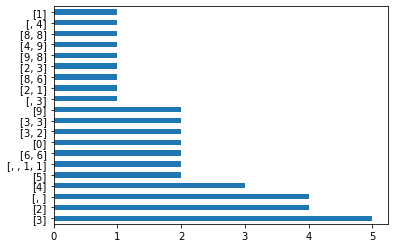

In [103]:
inputFields["falseAttempts"].value_counts().plot(kind='barh')

In [119]:
inputFields[np.where(inputFields["falseAttempts"] == inputFields["falseAttempts"], True, False)]

,pupilId,classId,taskId,taskSeriesId,duration,state,subType,evaluation,falseAttempts,hintsTaken,question,hints,sampleSolution,numberFalseAttempts
25,bniRycMi5bwrXjvGy,qFEyvypMn4sAwLwtc,Clustering-1-1-3,Clustering-1,113,8,inputField,correct,[9],1,Wie viele Youtuber sind sowohl sehr aktiv als ...,In welchem Cluster sind die beliebtesten und a...,8,1.0
91,sqBXKssFvS8pFYAMv,qFEyvypMn4sAwLwtc,Clustering-1-1-3,Clustering-1,61,8,inputField,correct,"[3, 3]",1,Wie viele Youtuber sind sowohl sehr aktiv als ...,In welchem Cluster sind die beliebtesten und a...,8,2.0
298,FhFN5eiQduwiYKWEn,qFEyvypMn4sAwLwtc,Clustering-1-1-3,Clustering-1,176,8,inputField,correct,[9],1,Wie viele Youtuber sind sowohl sehr aktiv als ...,In welchem Cluster sind die beliebtesten und a...,8,1.0
299,FhFN5eiQduwiYKWEn,qFEyvypMn4sAwLwtc,Clustering-1-1-4,Clustering-1,70,7,inputField,false,"[9, 8]",1,"Wie viele Youtuber sind aktiv, haben aber nich...","Welche Gruppe hat viele Uploads, aber nicht so...",7,2.0
398,hn2oJ5p2CwPfG44wx,qFEyvypMn4sAwLwtc,Clustering-1-1-3,Clustering-1,142,8,inputField,correct,[3],1,Wie viele Youtuber sind sowohl sehr aktiv als ...,In welchem Cluster sind die beliebtesten und a...,8,1.0
452,dotjrftFetJme4iPH,qFEyvypMn4sAwLwtc,Clustering-1-1-3,Clustering-1,141,8,inputField,correct,[3],1,Wie viele Youtuber sind sowohl sehr aktiv als ...,In welchem Cluster sind die beliebtesten und a...,8,1.0
537,kdqG4fXAK64zdrqN8,qFEyvypMn4sAwLwtc,Classification-2-1-3,Classification-2,27,3,inputField,false,[2],NaN,Wie viele Filme stimmen zwischen Mahmud und Al...,NaN,3,1.0
643,aiaYpPdYWJKb2hs7J,qFEyvypMn4sAwLwtc,Clustering-1-1-3,Clustering-1,44,8,inputField,false,"[6, 6]",1,Wie viele Youtuber sind sowohl sehr aktiv als ...,In welchem Cluster sind die beliebtesten und a...,8,2.0
680,C2BW6tdii778v4RfL,qFEyvypMn4sAwLwtc,Clustering-1-1-3,Clustering-1,45,8,inputField,false,"[3, 2]",1,Wie viele Youtuber sind sowohl sehr aktiv als ...,In welchem Cluster sind die beliebtesten und a...,8,2.0
681,C2BW6tdii778v4RfL,qFEyvypMn4sAwLwtc,Clustering-1-1-4,Clustering-1,22,7,inputField,false,"[8, 6]",1,"Wie viele Youtuber sind aktiv, haben aber nich...","Welche Gruppe hat viele Uploads, aber nicht so...",7,2.0


In [122]:
inputFields[np.where(inputFields["falseAttempts"] == inputFields["falseAttempts"], True, False) & np.where(len(inputFields["falseAttempts"])  >=3, True, False)]

,pupilId,classId,taskId,taskSeriesId,duration,state,subType,evaluation,falseAttempts,hintsTaken,question,hints,sampleSolution,numberFalseAttempts
25,bniRycMi5bwrXjvGy,qFEyvypMn4sAwLwtc,Clustering-1-1-3,Clustering-1,113,8,inputField,correct,[9],1,Wie viele Youtuber sind sowohl sehr aktiv als ...,In welchem Cluster sind die beliebtesten und a...,8,1.0
91,sqBXKssFvS8pFYAMv,qFEyvypMn4sAwLwtc,Clustering-1-1-3,Clustering-1,61,8,inputField,correct,"[3, 3]",1,Wie viele Youtuber sind sowohl sehr aktiv als ...,In welchem Cluster sind die beliebtesten und a...,8,2.0
298,FhFN5eiQduwiYKWEn,qFEyvypMn4sAwLwtc,Clustering-1-1-3,Clustering-1,176,8,inputField,correct,[9],1,Wie viele Youtuber sind sowohl sehr aktiv als ...,In welchem Cluster sind die beliebtesten und a...,8,1.0
299,FhFN5eiQduwiYKWEn,qFEyvypMn4sAwLwtc,Clustering-1-1-4,Clustering-1,70,7,inputField,false,"[9, 8]",1,"Wie viele Youtuber sind aktiv, haben aber nich...","Welche Gruppe hat viele Uploads, aber nicht so...",7,2.0
398,hn2oJ5p2CwPfG44wx,qFEyvypMn4sAwLwtc,Clustering-1-1-3,Clustering-1,142,8,inputField,correct,[3],1,Wie viele Youtuber sind sowohl sehr aktiv als ...,In welchem Cluster sind die beliebtesten und a...,8,1.0
452,dotjrftFetJme4iPH,qFEyvypMn4sAwLwtc,Clustering-1-1-3,Clustering-1,141,8,inputField,correct,[3],1,Wie viele Youtuber sind sowohl sehr aktiv als ...,In welchem Cluster sind die beliebtesten und a...,8,1.0
537,kdqG4fXAK64zdrqN8,qFEyvypMn4sAwLwtc,Classification-2-1-3,Classification-2,27,3,inputField,false,[2],NaN,Wie viele Filme stimmen zwischen Mahmud und Al...,NaN,3,1.0
643,aiaYpPdYWJKb2hs7J,qFEyvypMn4sAwLwtc,Clustering-1-1-3,Clustering-1,44,8,inputField,false,"[6, 6]",1,Wie viele Youtuber sind sowohl sehr aktiv als ...,In welchem Cluster sind die beliebtesten und a...,8,2.0
680,C2BW6tdii778v4RfL,qFEyvypMn4sAwLwtc,Clustering-1-1-3,Clustering-1,45,8,inputField,false,"[3, 2]",1,Wie viele Youtuber sind sowohl sehr aktiv als ...,In welchem Cluster sind die beliebtesten und a...,8,2.0
681,C2BW6tdii778v4RfL,qFEyvypMn4sAwLwtc,Clustering-1-1-4,Clustering-1,22,7,inputField,false,"[8, 6]",1,"Wie viele Youtuber sind aktiv, haben aber nich...","Welche Gruppe hat viele Uploads, aber nicht so...",7,2.0


In [118]:
for entry in inputFields[np.where(inputFields["falseAttempts"] == inputFields["falseAttempts"], True, False)]["falseAttempts"]:
    print(len(entry))

1
2
1
2
1
1
1
2
2
2
2
2
2
2
1
1
1
2
1
2
1
2
1
1
1
1
1
1
1
4
4
1
2
2
2
2
2
1
2


In [104]:
inputFields["falseAttempts"].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[3]           5
[2]           4
[, ]          4
[4]           3
[5]           2
[, , 1, 1]    2
[6, 6]        2
[0]           2
[3, 2]        2
[3, 3]        2
[9]           2
[, 3]         1
[2, 1]        1
[8, 6]        1
[2, 3]        1
[9, 8]        1
[4, 9]        1
[8, 8]        1
[, 4]         1
[1]           1
Name: falseAttempts, dtype: int64

In [105]:
inputFields[inputFields["falseAttempts"].str == ""]

KeyError: False

In [106]:
inputFields[np.where(len(inputFields["falseAttempts"]) > 2, True, False)] #"[, , 1, 1]"

KeyError: True

## Pupil performance df

In [108]:
nr_tasks_per_pupil = []
total_duration_per_pupil = []

for pupilId in df["pupilId"].unique():
    nr_tasks_per_pupil.append(len(df[df["pupilId"]==pupilId]))
    total_duration_per_pupil.append(sum(df[df["pupilId"]==pupilId]["duration"])/60)

pupil_performance = {"pupilId": df["pupilId"].unique(), "nr_tasks_per_pupil": nr_tasks_per_pupil, "total_duration in minutes": total_duration_per_pupil}
pupil_performance_df = pd.DataFrame(pupil_performance)
pupil_performance_df["average duration per task in minutes"] = pupil_performance_df["total_duration in minutes"]/pupil_performance_df["nr_tasks_per_pupil"]

pupil_performance_df.head()

,pupilId,nr_tasks_per_pupil,total_duration in minutes,average duration per task in minutes
0,bniRycMi5bwrXjvGy,66,70.233333,1.064141
1,sqBXKssFvS8pFYAMv,66,66.650000,1.009848
2,Kd6FuRsrq6QvPrkKp,6,37.383333,6.230556
3,6bBwnX2mwAp2NAwNR,35,114.550000,3.272857
4,ZTvPk2i77LDC8pFmu,66,59.400000,0.900000


## Saving the DFs as csvs

In [62]:
#pupil_performance_df.to_csv('pupil_performance.csv')
#df.to_csv('df.csv')

In [63]:
#storedf = pd.HDFStore("store.h5")
#storedf["df"] = df

/Users/jean-philipp/Documents/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3417: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block1_values] [items->Index(['pupilId', 'classId', 'taskId', 'taskSeriesId', 'duration', 'state',
       'submitted', 'subType', 'evaluation', 'falseAttempts', 'hintsTaken',
       'rating', 'teacherFeedback', 'question', 'answers', 'minLabel',
       'maxLabel', 'hints', 'sampleSolution'],
      dtype='object')]

  exec(code_obj, self.user_global_ns, self.user_ns)


In [109]:
pupil_performance_df.to_pickle('pupil_performance.pkl')
df.to_pickle('df.pkl')
chat_df.to_pickle("chat.pkl")
surveySlider.to_pickle('surveySlider.pkl')
inputFields.to_pickle('inputFields.pkl')
multipleChoice.to_pickle('multipleChoice.pkl')
freetext.to_pickle('freetext.pkl')